<a href="https://colab.research.google.com/github/tehminaaziz5/Traveltide-Reward-Data-Retrieval-Analysis-Project/blob/main/TravelTide_Reward_Data_Retrieval_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TravelTide Data Retrieval & Customer Behavior Analysis
## Project Overview            
The goal of this project is to support the Head of Marketing at TravelTide, a digital travel booking platform, in developing a personalized rewards program that improves customer engagement, loyalty, and retention. Using a combination of customer profile data, session activity, flight bookings, and hotel reservations, this analysis uncovers behavioral patterns across the user journey—from browsing, to booking, to repeat engagement.

The project is divided into three major components:

1. **Session-Level Exploration**: understanding user behavior at the session level (Part 1)

2. **User-Level Aggregation**: transforming session data into rich customer profiles (Part 2)

3. **Segmentation & Insights**: grouping users into actionable segments for targeted marketing (Part 3)

Each part builds on the previous one, moving from raw behavioral signals to strategic insights.


## Part 1: Session-Level Exploration
####Objective
##### In this part, I explore how customers interact with the TravelTide platform on a session level.
I focus on engagement metrics (session duration, clicks), booking behavior, discount usage, and cancellations.
The goal is to understand typical session patterns and prepare a clean, enriched session dataset for later user-level and segmentation analysis.


#### 2. Methodology

##### Methodology: Session-Level Exploration

1. Import the combined TravelTide dataset from Google Drive.

2. Inspect the structure, data types, and completeness of key session fields.

3. Clean the data by parsing timestamps, creating a session duration feature, and handling duplicates and types.

4. Perform exploratory analysis of session duration, click activity, booking behavior, discount usage, and cancellations.

5. Summarize insights and export a cleaned, session-enriched dataset for the next project parts.



#### 3. Data Import & Initial Inspection
3.1 Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sa
import psycopg2

3.2 Import Dataset from Google Drive

In [ ]:
# 3.2 Import Dataset
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/traveltide_data_df.csv"

sessions = pd.read_csv(file_path, low_memory=False)

sessions.head()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,session_id,user_id,trip_id,session_start,session_end,page_clicks,flight_discount,flight_discount_amount,flight_booked,hotel_discount,...,trip_airline,destination_airport_lat,destination_airport_lon,flight_base_fare_usd,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_base_nightly_rate_usd
0,811077-d17f2c17ecbb421f828098adbdd6ca65,811077,811077-f7b380273eba443aa97c90566b799733,2023-07-09 19:56:00,2023-07-09 19:59:41,29,False,NaN,True,False,...,Frontier Airlines,36.776,-119.718,579.79,Radisson - fresno,6.0,1.0,2023-07-20 15:58:51.78,2023-07-27 11:00:00,142.0
1,801660-5f6c06e8d8b44be19444a20201d81660,801660,801660-d7da52bc87254b69a3723fd71b8641eb,2023-06-28 18:31:00,2023-06-28 18:33:41,22,False,NaN,True,False,...,WestJet,41.786,-87.752,122.80,Accor - chicago,2.0,1.0,2023-07-06 12:54:05.085,2023-07-09 11:00:00,209.0
2,801660-cec445f0da654bc8b63cf0ad585217d8,801660,801660-3e19911e64574bf19b6b80ec0d6e71c7,2023-05-03 06:53:00,2023-05-03 06:55:24,20,False,NaN,True,False,...,JetBlue Airways,41.786,-87.752,141.03,InterContinental - chicago,2.0,1.0,2023-05-11 10:54:05.085,2023-05-13 11:00:00,121.0
3,801660-b575dec35fd64aaeb7f569481e2245a6,801660,801660-ac58e7357f4c4ea89215d21aa257946b,2023-07-19 19:52:00,2023-07-19 19:55:13,26,True,0.15,True,False,...,United Airlines,41.786,-87.752,146.13,Starwood - chicago,2.0,1.0,2023-07-23 10:54:05.085,2023-07-25 11:00:00,106.0
4,796032-2dc9a9e331b34eab8da9b5e32dc60ef9,796032,796032-e866b3cd59b64e81aab5cdfdac22e7ef,2023-06-12 13:04:00,2023-06-12 13:06:04,17,True,0.10,True,False,...,Germania,53.630,9.988,2250.06,NaN,NaN,NaN,NaN,NaN,NaN


3.3 Check shape & info

In [ ]:
# Basic shape
print("Rows:", sessions.shape[0])
print("Columns:", sessions.shape[1])

# Data types
sessions.info()

# Quick numerical summary
sessions.describe().T.head(10)


Rows: 49211
Columns: 41
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49211 entries, 0 to 49210
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   session_id                   49211 non-null  object 
 1   user_id                      49211 non-null  int64  
 2   trip_id                      16702 non-null  object 
 3   session_start                49211 non-null  object 
 4   session_end                  49211 non-null  object 
 5   page_clicks                  49211 non-null  int64  
 6   flight_discount              49211 non-null  bool   
 7   flight_discount_amount       8282 non-null   float64
 8   flight_booked                49211 non-null  bool   
 9   hotel_discount               49211 non-null  bool   
 10  hotel_discount_amount        6205 non-null   float64
 11  hotel_booked                 49211 non-null  bool   
 12  cancellation                 49211 non-null  bool 

,count,mean,std,min,25%,50%,75%,max
user_id,49211.0,545282.694946,64640.047648,23557.000,517119.000,540308.000,573922.000,844489.000
page_clicks,49211.0,17.588791,21.495987,1.000,6.000,13.000,22.000,566.000
flight_discount_amount,8282.0,0.139864,0.083914,0.050,0.100,0.100,0.200,0.600
hotel_discount_amount,6205.0,0.112192,0.062119,0.050,0.050,0.100,0.150,0.450
home_airport_lat,49211.0,38.427222,6.185962,21.316,33.818,39.103,42.238,61.251
home_airport_lon,49211.0,-94.183762,18.065868,-157.927,-112.383,-90.035,-79.370,-63.499
seats,14270.0,1.215207,0.585891,1.000,1.000,1.000,1.000,8.000
checked_bags,14270.0,0.592922,0.677641,0.000,0.000,1.000,1.000,8.000
destination_airport_lat,14270.0,38.610024,6.949739,-37.008,33.942,39.872,42.409,55.972
destination_airport_lon,14270.0,-88.947203,33.090373,-157.927,-112.383,-87.752,-75.241,174.792


3.4 Check Missing Values (Session-Relevant Columns)

In [ ]:
session_cols = [
    "session_id", "user_id", "trip_id",
    "session_start", "session_end",
    "page_clicks",
    "flight_discount", "flight_discount_amount", "flight_booked",
    "hotel_discount", "hotel_discount_amount", "hotel_booked",
    "cancellation"
]

sessions[session_cols].isna().sum()


,0
session_id,0
user_id,0
trip_id,32509
session_start,0
session_end,0
page_clicks,0
flight_discount,0
flight_discount_amount,40929
flight_booked,0
hotel_discount,0


### 4. Data Cleaning

In [ ]:
# --- 1) Create a working copy first (IMPORTANT!) ---
sessions_clean = sessions.copy()

# --- 2) Parse session start/end into datetime ---
sessions_clean["session_start"] = pd.to_datetime(sessions_clean["session_start"], errors="coerce")
sessions_clean["session_end"]   = pd.to_datetime(sessions_clean["session_end"], errors="coerce")

# --- 3) Optional: Parse other time-related columns ---
time_cols = [
    "birthdate", "sign_up_date", "departure_time", "return_time",
    "check_in_time", "check_out_time"
]

for col in time_cols:
    if col in sessions_clean.columns:
        sessions_clean[col] = pd.to_datetime(sessions_clean[col], errors="coerce")

# --- 4) Create session duration in minutes ---
sessions_clean["session_duration_min"] = (
    (sessions_clean["session_end"] - sessions_clean["session_start"])
    .dt.total_seconds() / 60
)

# --- 5) Show summary ---
sessions_clean["session_duration_min"].describe()


,session_duration_min
count,48968.000000
mean,2.842386
std,10.055178
min,0.100000
25%,0.750000
50%,1.583333
75%,2.683333
max,120.000000


4.1 Remove Duplicated Sessions

In [ ]:
dup_count = sessions_clean["session_id"].duplicated().sum()
print("Duplicated session_id rows:", dup_count)

if dup_count > 0:
    sessions_clean = sessions_clean.drop_duplicates(subset="session_id")


Duplicated session_id rows: 0


4.2 Fix Data Types for Booking-Related Columns

In [ ]:
# Ensure booking / discount flags are boolean
bool_cols = [
    "flight_discount", "flight_booked",
    "hotel_discount", "hotel_booked",
    "cancellation"
]

for col in bool_cols:
    if col in sessions_clean.columns:
        sessions_clean[col] = sessions_clean[col].astype("bool")

# return_flight_booked is mixed (True/False/NaN), convert to nullable boolean
if "return_flight_booked" in sessions_clean.columns:
    sessions_clean["return_flight_booked"] = (
        sessions_clean["return_flight_booked"]
        .astype("boolean")
    )

sessions_clean[bool_cols].dtypes





,0
flight_discount,bool
flight_booked,bool
hotel_discount,bool
hotel_booked,bool
cancellation,bool


4.3 Final Quick Data Health Check

In [ ]:
# Check for negative or zero durations just in case
print("Min duration:", sessions_clean["session_duration_min"].min())
print("Max duration:", sessions_clean["session_duration_min"].max())

# Check nulls for key columns after cleaning
sessions_clean[["session_duration_min", "page_clicks", "flight_booked", "hotel_booked", "cancellation"]].isna().sum()


Min duration: 0.1
Max duration: 120.0


,0
session_duration_min,243
page_clicks,0
flight_booked,0
hotel_booked,0
cancellation,0


### 5. Feature Engineering for Customer Behavior Analysis

Before conducting exploratory analysis, additional features are engineered to capture
key aspects of session behavior, booking activity, trip characteristics, and user demographics.
These derived variables enhance interpretability and provide richer signals for understanding
customer behavior.

The enrichment process includes:
- **User attributes** such as age and account age to reflect customer maturity.
- **Session dynamics** including session duration and interaction intensity.
- **Booking indicators** that distinguish booking type, booking status, and discount usage.
- **Trip characteristics** such as trip timing, duration, distance, and category.
- **Cost-related features** capturing base cost, discounts, and total trip cost.

All features are created using a working copy of the cleaned dataset to preserve data integrity.
The resulting enriched dataset serves as the foundation for exploratory analysis and subsequent
user-level aggregation and segmentation.


#### 5.1 user_age
User age in years calculated from birthdate using a fixed reference date.


In [65]:
reference_date = pd.Timestamp("2025-01-01")

sessions_enriched["birthdate"] = pd.to_datetime(
    sessions_enriched["birthdate"], errors="coerce"
)

sessions_enriched["user_age"] = (
    (reference_date - sessions_enriched["birthdate"]).dt.days // 365
).astype("Int64")

print(sessions_enriched[["user_age"]].head())
print(f"\nMissing values: {sessions_enriched['user_age'].isna().sum()}")


   user_age
0        45
1        55
2        55
3        55
4        52

Missing values: 0


#### 5.2 account_age_months
Account age in months based on user sign-up date.


In [66]:
sessions_enriched["sign_up_date"] = pd.to_datetime(
    sessions_enriched["sign_up_date"], errors="coerce"
)

sessions_enriched["account_age_months"] = (
    (reference_date - sessions_enriched["sign_up_date"]).dt.days / 30.42
).round(0).astype("Int64")

print(sessions_enriched[["account_age_months"]].head())
print(f"\nMissing values: {sessions_enriched['account_age_months'].isna().sum()}")


   account_age_months
0                  20
1                  20
2                  20
3                  20
4                  20

Missing values: 0


#### 5.3 session_duration_min
Length of each user session in minutes.


In [67]:
sessions_enriched["session_start"] = pd.to_datetime(
    sessions_enriched["session_start"], errors="coerce"
)
sessions_enriched["session_end"] = pd.to_datetime(
    sessions_enriched["session_end"], errors="coerce"
)

sessions_enriched["session_duration_min"] = (
    (sessions_enriched["session_end"] - sessions_enriched["session_start"])
    .dt.total_seconds() / 60
)

print(sessions_enriched[["session_duration_min"]].head())
print(f"\nMissing values: {sessions_enriched['session_duration_min'].isna().sum()}")


   session_duration_min
0              3.683333
1              2.683333
2              2.400000
3              3.216667
4              2.066667

Missing values: 243


#### 5.4 clicks_per_min
Average number of page clicks per minute during a session.


In [68]:
sessions_enriched["clicks_per_min"] = (
    sessions_enriched["page_clicks"] /
    sessions_enriched["session_duration_min"].replace(0, np.nan)
)

print(sessions_enriched[["clicks_per_min"]].head())
print(f"\nMissing values: {sessions_enriched['clicks_per_min'].isna().sum()}")


   clicks_per_min
0        7.873303
1        8.198758
2        8.333333
3        8.082902
4        8.225806

Missing values: 243


#### 5.5 booking_type
Categorizes the type of booking made during a session.


In [69]:
fb = sessions_enriched["flight_booked"].fillna(0).astype(int)
hb = sessions_enriched["hotel_booked"].fillna(0).astype(int)

sessions_enriched["booking_type"] = np.select(
    [(fb == 1) & (hb == 1), fb == 1, hb == 1],
    ["Both", "Flight Only", "Hotel Only"],
    default="None"
)

print(sessions_enriched[["booking_type"]].head())
print(f"\nMissing values: {sessions_enriched['booking_type'].isna().sum()}")


  booking_type
0         Both
1         Both
2         Both
3         Both
4  Flight Only

Missing values: 0


#### 5.6 booking_status_indication
Indicates whether a booking was completed or cancelled.


In [70]:
sessions_enriched["booking_status"] = np.select(
    [
        sessions_enriched["booking_type"] != "None",
        sessions_enriched["booking_type"] == "None"
    ],
    ["Booked", "Not Booked"],
    default=None
)

sessions_enriched.loc[
    sessions_enriched["cancellation"] == 1, "booking_status"
] = "Cancelled"

print(sessions_enriched[["booking_status"]].head())
print(f"\nMissing values: {sessions_enriched['booking_status'].isna().sum()}")


  booking_status
0         Booked
1         Booked
2         Booked
3         Booked
4         Booked

Missing values: 0


#### 5.7 Trip Start and End (Date & Day)

This step derives the trip start and end dates from flight departure and return times,
and extracts the corresponding day of the week for each.


In [75]:
# Ensure datetime conversion
sessions_enriched["departure_time"] = pd.to_datetime(
    sessions_enriched["departure_time"], errors="coerce"
)
sessions_enriched["return_time"] = pd.to_datetime(
    sessions_enriched["return_time"], errors="coerce"
)

# Trip start & day
sessions_enriched["trip_start"] = sessions_enriched["departure_time"]
sessions_enriched["trip_start_day"] = sessions_enriched["trip_start"].dt.day_name()

# Trip end & day
sessions_enriched["trip_end"] = sessions_enriched["return_time"]
sessions_enriched["trip_end_day"] = sessions_enriched["trip_end"].dt.day_name()

# Output checks
print(sessions_enriched[["trip_start", "trip_start_day"]].head())
print(f"\nMissing values (trip_start): {sessions_enriched['trip_start'].isna().sum()}")
print(f"Missing values (trip_start_day): {sessions_enriched['trip_start_day'].isna().sum()}")

print("\n", "-"*50, "\n")

print(sessions_enriched[["trip_end", "trip_end_day"]].head())
print(f"\nMissing values (trip_end): {sessions_enriched['trip_end'].isna().sum()}")
print(f"Missing values (trip_end_day): {sessions_enriched['trip_end_day'].isna().sum()}")


           trip_start trip_start_day
0 2023-07-20 10:00:00       Thursday
1 2023-07-06 10:00:00       Thursday
2 2023-05-11 08:00:00       Thursday
3 2023-07-23 08:00:00         Sunday
4 2023-11-28 17:00:00        Tuesday

Missing values (trip_start): 34941
Missing values (trip_start_day): 34941

 -------------------------------------------------- 

             trip_end trip_end_day
0 2023-07-28 10:00:00       Friday
1 2023-07-09 10:00:00       Sunday
2 2023-05-14 08:00:00       Sunday
3 2023-07-26 08:00:00    Wednesday
4 2023-12-07 17:00:00     Thursday

Missing values (trip_end): 35559
Missing values (trip_end_day): 35559


#### 5.8 trip_duration_days
Total duration of the trip in days.


In [76]:
sessions_enriched["trip_duration_days"] = (
    (sessions_enriched["trip_end"] - sessions_enriched["trip_start"])
    .dt.total_seconds() / (3600 * 24)
)

print(sessions_enriched[["trip_duration_days"]].head())
print(f"\nMissing values: {sessions_enriched['trip_duration_days'].isna().sum()}")


   trip_duration_days
0                 8.0
1                 3.0
2                 3.0
3                 3.0
4                 9.0

Missing values: 35559


#### 5.9 trip_category
Classifies trips into Short, Medium, or Long duration.


In [77]:
d = pd.to_numeric(
    sessions_enriched["trip_duration_days"], errors="coerce"
)

sessions_enriched["trip_category"] = np.select(
    [d < 3, (d >= 3) & (d <= 7), d > 7],
    ["Short", "Medium", "Long"],
    default="Unknown"
)

print(sessions_enriched[["trip_category"]].head())
print(f"\nMissing values: {sessions_enriched['trip_category'].isna().sum()}")


  trip_category
0          Long
1        Medium
2        Medium
3        Medium
4          Long

Missing values: 0


#### 5.10 trip_distance_km
Approximate flight distance in kilometers using airport coordinates.


In [78]:
lat1 = np.radians(sessions_enriched["home_airport_lat"])
lon1 = np.radians(sessions_enriched["home_airport_lon"])
lat2 = np.radians(sessions_enriched["destination_airport_lat"])
lon2 = np.radians(sessions_enriched["destination_airport_lon"])

a = np.sin((lat2-lat1)/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin((lon2-lon1)/2)**2
sessions_enriched["trip_distance_km"] = 6371 * (2 * np.arcsin(np.sqrt(a)))

print(sessions_enriched[["trip_distance_km"]].head())
print(f"\nMissing values: {sessions_enriched['trip_distance_km'].isna().sum()}")


   trip_distance_km
0       3184.843425
1        721.127119
2        721.127119
3        721.127119
4       6628.301727

Missing values: 34941


#### 5.11 trip_discount
Indicates whether any discount was applied to the trip.


In [79]:
sessions_enriched["trip_discount"] = (
    (sessions_enriched["flight_discount"].fillna(0) == 1) |
    (sessions_enriched["hotel_discount"].fillna(0) == 1)
).astype(int)

print(sessions_enriched[["trip_discount"]].head())
print(f"\nMissing values: {sessions_enriched['trip_discount'].isna().sum()}")


   trip_discount
0              0
1              0
2              0
3              1
4              1

Missing values: 0


#### 5.12 trip_discount_amount
Total discount amount applied to the trip.


In [80]:
sessions_enriched["trip_discount_amount"] = (
    sessions_enriched["flight_discount_amount"].fillna(0) +
    sessions_enriched["hotel_discount_amount"].fillna(0)
)

print(sessions_enriched[["trip_discount_amount"]].head())
print(f"\nMissing values: {sessions_enriched['trip_discount_amount'].isna().sum()}")


   trip_discount_amount
0                  0.00
1                  0.00
2                  0.00
3                  0.15
4                  0.10

Missing values: 0


#### 5.13 base_trip_cost
Total base cost before discounts (flight + hotel).  
If flight cost or hotel cost fields are missing, the missing part is treated as 0.


In [83]:
import pandas as pd
import numpy as np

# --- Flight base cost (safe) ---
# Try common flight cost columns in order of preference
flight_cost_candidates = ["base_fare_usd", "flight_base_fare_usd", "base_fare", "flight_fare_usd"]

flight_cost_col = next((c for c in flight_cost_candidates if c in sessions_enriched.columns), None)

if flight_cost_col:
    flight_cost = pd.to_numeric(sessions_enriched[flight_cost_col], errors="coerce").fillna(0)
else:
    flight_cost = pd.Series(0, index=sessions_enriched.index)

# --- Hotel base cost (safe) ---
if "hotel_per_room_usd" in sessions_enriched.columns:
    hotel_rate = pd.to_numeric(sessions_enriched["hotel_per_room_usd"], errors="coerce").fillna(0)

    rooms = pd.to_numeric(sessions_enriched["rooms"], errors="coerce").fillna(1) if "rooms" in sessions_enriched.columns else pd.Series(1, index=sessions_enriched.index)
    nights = pd.to_numeric(sessions_enriched["nights"], errors="coerce").fillna(1) if "nights" in sessions_enriched.columns else pd.Series(1, index=sessions_enriched.index)

    hotel_cost = hotel_rate * rooms * nights
else:
    hotel_cost = pd.Series(0, index=sessions_enriched.index)

# --- Base trip cost ---
sessions_enriched["base_trip_cost"] = flight_cost + hotel_cost

# Output checks (your style)
print(sessions_enriched[["base_trip_cost"]].head())
print(f"\nMissing values: {sessions_enriched['base_trip_cost'].isna().sum()}")

# Optional: show which flight cost column was used
print(f"\nFlight cost column used: {flight_cost_col}")


   base_trip_cost
0          579.79
1          122.80
2          141.03
3          146.13
4         2250.06

Missing values: 0

Flight cost column used: flight_base_fare_usd


#### 5.14 total_trip_cost
Final trip cost after applying discounts.


In [82]:
sessions_enriched["total_trip_cost"] = (
    sessions_enriched["base_trip_cost"] -
    sessions_enriched["trip_discount_amount"]
)

print(sessions_enriched[["total_trip_cost"]].head())
print(f"\nMissing values: {sessions_enriched['total_trip_cost'].isna().sum()}")


   total_trip_cost
0             0.00
1             0.00
2             0.00
3            -0.15
4            -0.10

Missing values: 0


#### 5.15 Extracted_hotel_chain
Extracted hotel chain name from hotel name.


In [84]:
sessions_enriched["hotel_chain"] = (
    sessions_enriched["hotel_name"].astype(str).str.split().str[0]
)

print(sessions_enriched[["hotel_chain"]].head())
print(f"\nMissing values: {sessions_enriched['hotel_chain'].isna().sum()}")


        hotel_chain
0          Radisson
1             Accor
2  InterContinental
3          Starwood
4               nan

Missing values: 0


#### 5.16 Column Cleanup Before Export
Remove helper columns not required for downstream analysis.


In [85]:
drop_cols = [c for c in ["flight_spend", "hotel_spend"] if c in sessions_enriched.columns]
sessions_enriched.drop(columns=drop_cols, inplace=True)

print("Columns after cleanup:", sessions_enriched.shape[1])


Columns after cleanup: 59


#### 5.17 Export Enriched Dataset
Save the enriched dataset for further analysis and segmentation.


In [87]:
sessions_enriched.to_csv("sessions_enriched.csv", index=False)

print("✅ Feature enrichment complete.")
print("Saved: sessions_enriched.csv")
print("Final shape:", sessions_enriched.shape)


✅ Feature enrichment complete.
Saved: sessions_enriched.csv
Final shape: (49211, 59)


### 6. Session-Level EDA
6.1 Distribution of Session Duration

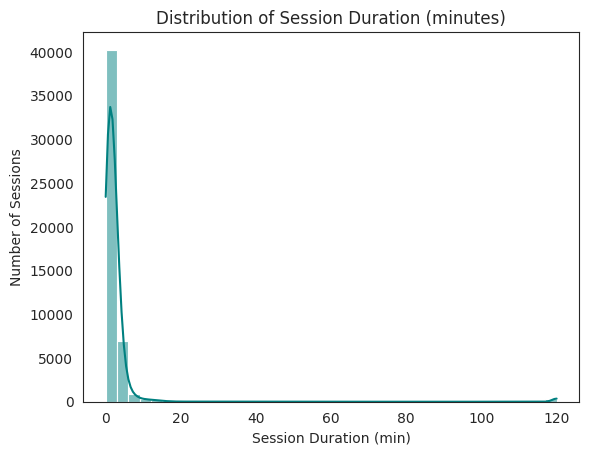

In [ ]:
sns.set_palette([teal])  # single-color plot

plt.figure()
sns.histplot(
    sessions_clean["session_duration_min"],
    bins=40,
    kde=True
)
plt.title("Distribution of Session Duration (minutes)")
plt.xlabel("Session Duration (min)")
plt.ylabel("Number of Sessions")
plt.show()


Insight:

Most sessions are relatively short (around 1–3 minutes), with a long tail of longer sessions.
This suggests that many visitors browse quickly, while a smaller group spends more time exploring or booking.

#### 6.2 Customer Segments by Search Intensity

These boxplots compare search intensity (clicks per minute) and session duration
across booking outcomes (Booked, Cancelled, Not Booked).  
This helps identify whether highly engaged sessions are associated with booking behavior.


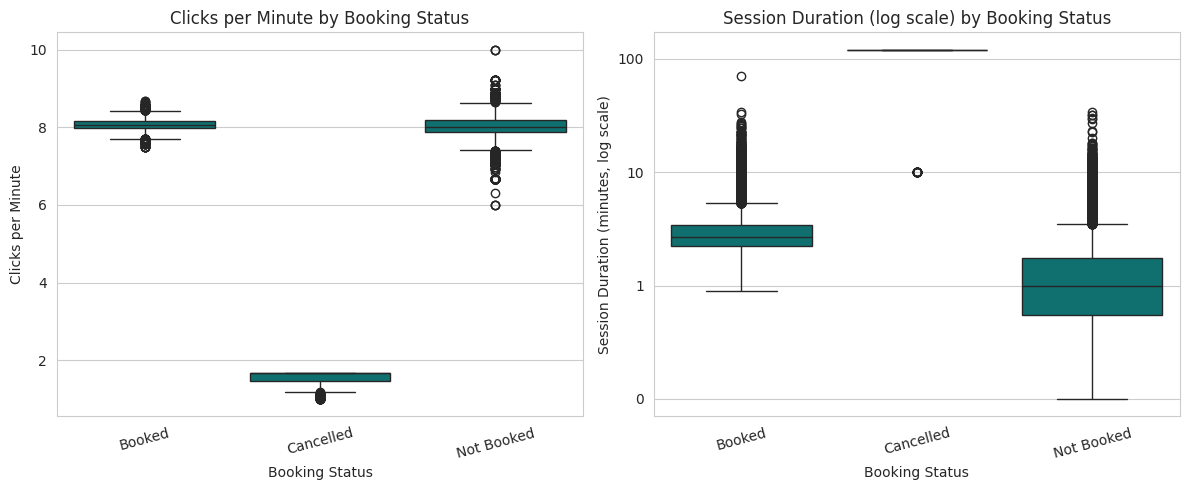

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Use your enriched dataset (or sessions_clean if that's what you're using)
eda_df = sessions_enriched.copy()  # <-- change to sessions_clean if needed

# --- Ensure required columns exist ---
# session_duration_min
if "session_duration_min" not in eda_df.columns:
    if "session_start" in eda_df.columns and "session_end" in eda_df.columns:
        eda_df["session_start"] = pd.to_datetime(eda_df["session_start"], errors="coerce")
        eda_df["session_end"] = pd.to_datetime(eda_df["session_end"], errors="coerce")
        eda_df["session_duration_min"] = (eda_df["session_end"] - eda_df["session_start"]).dt.total_seconds() / 60
    else:
        eda_df["session_duration_min"] = np.nan

# clicks_per_min
click_col = "page_clicks" if "page_clicks" in eda_df.columns else ("total_clicks" if "total_clicks" in eda_df.columns else None)
if "clicks_per_min" not in eda_df.columns:
    if click_col:
        eda_df["clicks_per_min"] = eda_df[click_col] / eda_df["session_duration_min"].replace(0, np.nan)
    else:
        eda_df["clicks_per_min"] = np.nan

# booking_status (if missing, create from your existing logic)
if "booking_status" not in eda_df.columns:
    # booking_type if present, otherwise infer from flight/hotel booked
    if "booking_type" in eda_df.columns:
        booked = eda_df["booking_type"].astype(str).ne("None")
    else:
        fb = eda_df.get("flight_booked", 0).fillna(0).astype(int)
        hb = eda_df.get("hotel_booked", 0).fillna(0).astype(int)
        booked = (fb == 1) | (hb == 1)

    cancel_col = "cancellation" if "cancellation" in eda_df.columns else ("is_cancelled" if "is_cancelled" in eda_df.columns else None)
    if cancel_col:
        cancelled = eda_df[cancel_col].fillna(0).astype(int).eq(1)
        eda_df["booking_status"] = np.select(
            [cancelled & booked, booked],
            ["Cancelled", "Booked"],
            default="Not Booked"
        )
    else:
        eda_df["booking_status"] = np.where(booked, "Booked", "Not Booked")

# --- Clean values for plotting ---
# clicks_per_min should be non-negative
eda_df.loc[eda_df["clicks_per_min"] < 0, "clicks_per_min"] = np.nan

# For log scale, session duration must be > 0
eda_df["session_duration_min_plot"] = eda_df["session_duration_min"].where(eda_df["session_duration_min"] > 0, np.nan)

# Optional: keep reasonable range (avoid extreme outliers ruining plot)
# eda_df.loc[eda_df["clicks_per_min"] > eda_df["clicks_per_min"].quantile(0.99), "clicks_per_min"] = np.nan

# --- Plot (two simple boxplots side-by-side) ---
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: clicks_per_min by booking_status
sns.boxplot(
    data=eda_df,
    x="booking_status",
    y="clicks_per_min",
    ax=axes[0]
)
axes[0].set_title("Clicks per Minute by Booking Status")
axes[0].set_xlabel("Booking Status")
axes[0].set_ylabel("Clicks per Minute")
axes[0].tick_params(axis='x', rotation=15)

# Plot 2: session_duration_min by booking_status (log scale)
sns.boxplot(
    data=eda_df,
    x="booking_status",
    y="session_duration_min_plot",
    ax=axes[1]
)
axes[1].set_yscale("log")
axes[1].yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[1].set_title("Session Duration (log scale) by Booking Status")
axes[1].set_xlabel("Booking Status")
axes[1].set_ylabel("Session Duration (minutes, log scale)")
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


6.3 Page Clicks: Engagement Intensity

99th percentile of page_clicks: 116.0
Original max: 566
Trimmed max for plot: 116


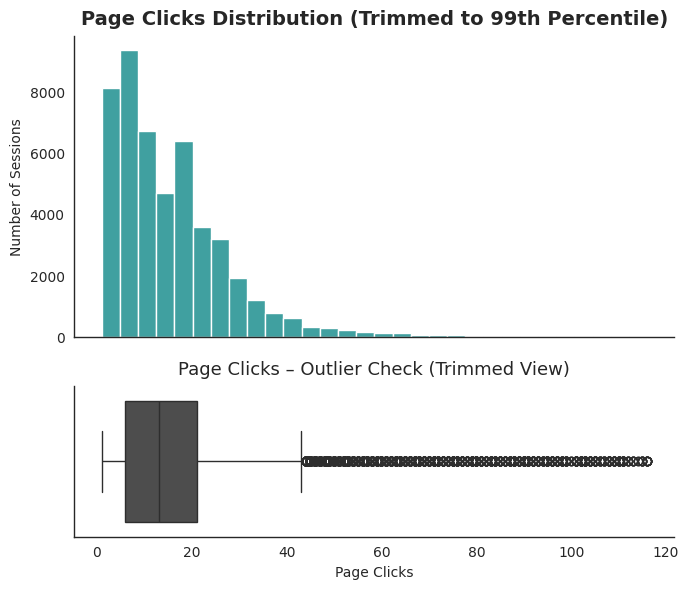

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
teal = "#008080"
dark_grey = "#4d4d4d"

# 1) Compute 99th percentile threshold for visualization
q99 = sessions_clean["page_clicks"].quantile(0.99)
print(f"99th percentile of page_clicks: {q99:.1f}")

# Use trimmed data ONLY for plotting
page_clicks_trimmed = sessions_clean.loc[
    sessions_clean["page_clicks"] <= q99,
    "page_clicks"
]

print("Original max:", sessions_clean["page_clicks"].max())
print("Trimmed max for plot:", page_clicks_trimmed.max())

# 2) Create histogram + boxplot stacked
fig, axes = plt.subplots(
    2, 1,
    figsize=(7,6),
    gridspec_kw={"height_ratios":[2,1]},
    sharex=True
)

# ---- Top: Histogram (trimmed) ----
sns.histplot(
    page_clicks_trimmed,
    bins=30,
    kde=False,
    color=teal,
    ax=axes[0]
)
axes[0].set_title("Page Clicks Distribution (Trimmed to 99th Percentile)",
                  fontsize=14, fontweight="bold", pad=8)
axes[0].set_ylabel("Number of Sessions")

# ---- Bottom: Boxplot (trimmed) ----
sns.boxplot(
    x=page_clicks_trimmed,
    color=dark_grey,
    ax=axes[1]
)
axes[1].set_title("Page Clicks – Outlier Check (Trimmed View)",
                  fontsize=13, pad=8)
axes[1].set_xlabel("Page Clicks")

# Clean, premium style
for ax in axes:
    ax.grid(False)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.spines["left"].set_linewidth(1)
    ax.spines["bottom"].set_linewidth(1)

plt.tight_layout()
plt.show()


Insight:

Page click activity is heavily concentrated at lower values, with a few sessions generating very high numbers of clicks.
This points to different engagement styles: quick scanners vs. deep planners.

##### 6.4 Search Intensity’s Impact on Trip Distance & Spend

This analysis examines the proportion of bookings made with and without discounts.
Understanding discount usage helps assess price sensitivity among users who complete bookings.


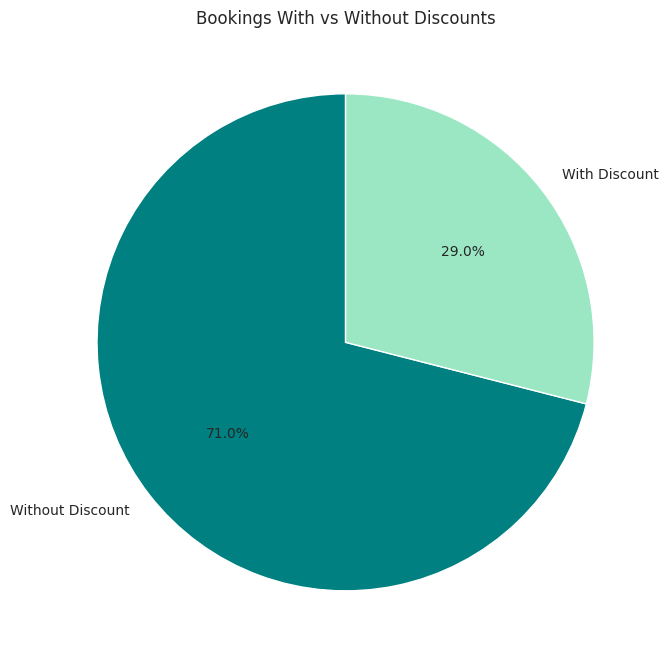

In [91]:
# Plot pie chart with corrected colors
plt.figure(figsize=(7, 7))

plt.pie(
    counts,
    labels=["Without Discount", "With Discount"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#008080", "#9BE7C4"]  # teal (71%), light green (29%)
)

plt.title("Bookings With vs Without Discounts")
plt.tight_layout()
plt.show()


Insight:  
The majority of completed bookings occur without discounts, suggesting that while discounts
play a role for some users, many bookings are driven by factors other than price incentives.


#### 6.5 Trip Distance vs Discount Usage

This boxplot compares trip distances for bookings made with and without discounts.
It helps assess whether discounts are more commonly used for shorter or longer trips.


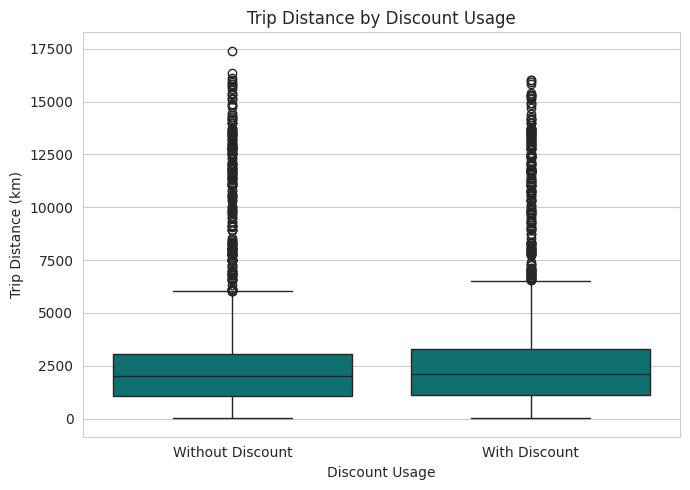

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use your enriched dataset
eda_df = sessions_enriched.copy()

# --------------------------------------------------
# Filter valid booking sessions with distance info
# --------------------------------------------------
plot_df = eda_df[
    (eda_df["booking_status"] != "Not Booked") &
    (eda_df["trip_distance_km"].notna()) &
    (eda_df["trip_distance_km"] > 0)
].copy()

# Ensure trip_discount is categorical for plotting
plot_df["trip_discount_label"] = plot_df["trip_discount"].map({
    0: "Without Discount",
    1: "With Discount"
})

# --------------------------------------------------
# Boxplot: Trip Distance vs Discount
# --------------------------------------------------
plt.figure(figsize=(7, 5))

sns.boxplot(
    data=plot_df,
    x="trip_discount_label",
    y="trip_distance_km"
)

plt.xlabel("Discount Usage")
plt.ylabel("Trip Distance (km)")
plt.title("Trip Distance by Discount Usage")
plt.tight_layout()
plt.show()


Insight:   
Trips booked with discounts tend to show a slightly wider distance range, suggesting that
discounts may play a stronger role in incentivizing longer or more variable trips.


#### 6.6 Distribution of Numeric Features for Discount Uptakers

This analysis explores the distribution of key numeric features among users
who completed bookings with discounts. It helps identify behavioral and trip
characteristics associated with discount usage.


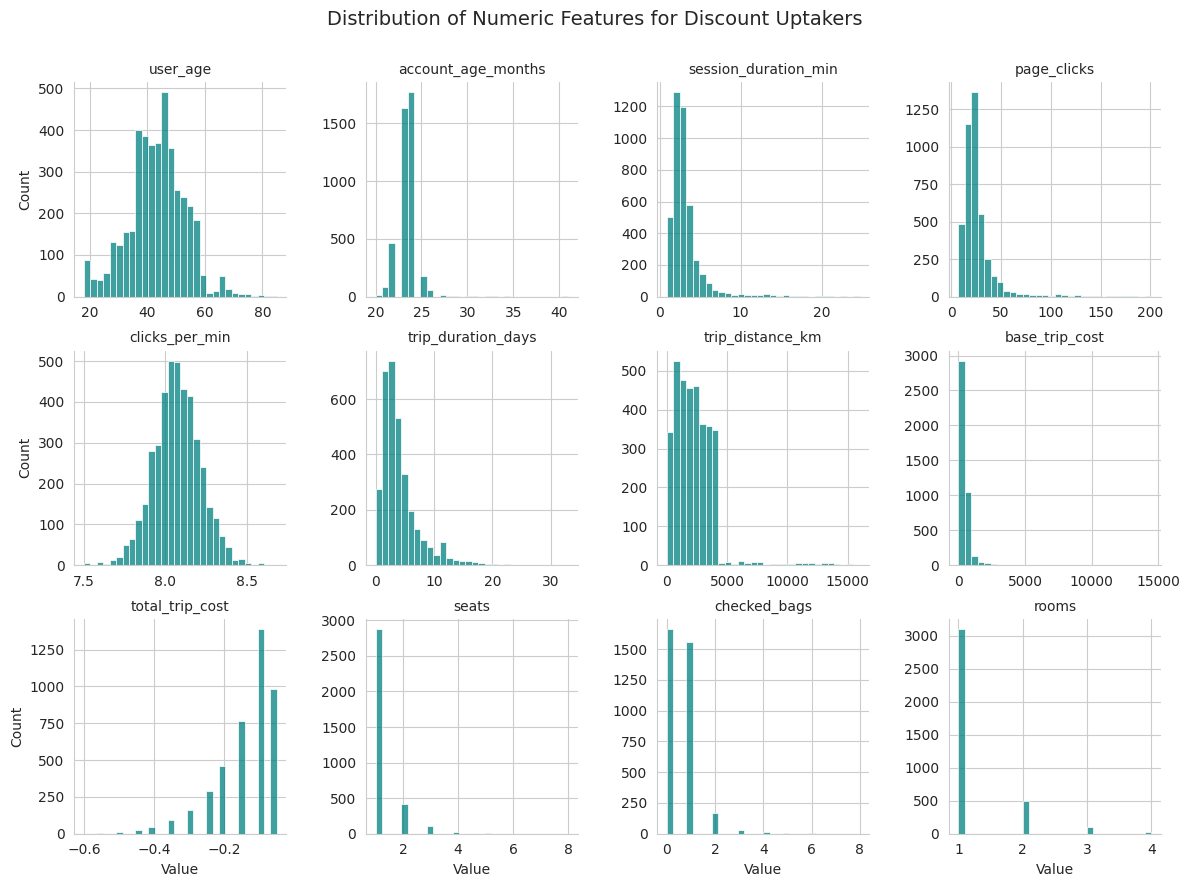

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Use your enriched dataset
eda_df = sessions_enriched.copy()

# --------------------------------------------------
# Filter: completed or cancelled bookings WITH discounts
# --------------------------------------------------
discount_df = eda_df[
    (eda_df["booking_status"] != "Not Booked") &
    (eda_df["trip_discount_amount"].fillna(0) > 0)
].copy()

# --------------------------------------------------
# Select numeric features (keep only those that exist)
# --------------------------------------------------
candidate_features = [
    "user_age",
    "account_age_months",
    "session_duration_min",
    "page_clicks",
    "clicks_per_min",
    "trip_duration_days",
    "trip_distance_km",
    "base_trip_cost",
    "total_trip_cost",
    "seats",
    "checked_bags",
    "rooms"
]

features = [f for f in candidate_features if f in discount_df.columns]

# --------------------------------------------------
# Melt into long format
# --------------------------------------------------
long_df = discount_df[features].melt(
    var_name="feature",
    value_name="value"
)

# Remove missing values for clean histograms
long_df = long_df.dropna()

# --------------------------------------------------
# FacetGrid: histogram for each feature
# --------------------------------------------------
g = sns.FacetGrid(
    long_df,
    col="feature",
    col_wrap=4,
    sharex=False,
    sharey=False
)

g.map_dataframe(sns.histplot, x="value", bins=30)

# --------------------------------------------------
# Titles and labels
# --------------------------------------------------
g.fig.suptitle(
    "Distribution of Numeric Features for Discount Uptakers",
    fontsize=14
)

g.set_titles("{col_name}")
g.set_xlabels("Value")
g.set_ylabels("Count")

plt.subplots_adjust(top=0.9)
plt.show()


Explanation:   
The distributions show that discount uptakers exhibit diverse trip distances,
durations, and cost profiles. This suggests that discounts are not limited to
a single user type but are used across a range of travel behaviors.


##### 6.7 Booking Funnel at Session Level

In [ ]:
# 5.6 Booking Funnel at Session Level

# Prepare a list to hold booking types and their rates
booking_data = []

if "flight_booked" in sessions_clean.columns:
    booking_data.append((
        "Flight booked",
        sessions_clean["flight_booked"].mean()
    ))

if "hotel_booked" in sessions_clean.columns:
    booking_data.append((
        "Hotel booked",
        sessions_clean["hotel_booked"].mean()
    ))

# Create a tidy DataFrame with booking_type + booking_rate
booking_summary = pd.DataFrame(
    booking_data,
    columns=["booking_type", "booking_rate"]
)

# Convert to percentage
booking_summary["booking_rate_percent"] = booking_summary["booking_rate"] * 100

booking_summary


,booking_type,booking_rate,booking_rate_percent
0,Flight booked,0.290992,29.099185
1,Hotel booked,0.303164,30.316393


Plot booking rates

/tmp/ipython-input-1272771317.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


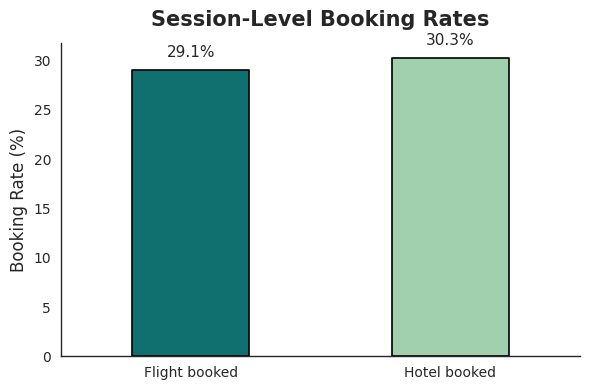

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ultra-premium colors
teal = "#008080"
light_green = "#98D8AA"   # elegant luxury green

plt.figure(figsize=(6,4))

# Remove background grid + set clean style
sns.set_style("white")

# ---- Custom ULTRA-PREMIUM BARPLOT ----
ax = sns.barplot(
    data=booking_summary,
    x="booking_type",
    y="booking_rate_percent",
    palette=[teal, light_green],
    edgecolor="black",
    width=0.45
)

# Add rounded bar corners + shadow-like effect
for bar in ax.patches:
    bar.set_linewidth(1.2)        # crisp border
    bar.set_joinstyle("round")    # rounded corners

# Value labels on top
for bar in ax.patches:
    value = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        value + 1,                         # position slightly above bar
        f"{value:.1f}%",
        ha='center', va='bottom',
        fontsize=11, fontweight='medium'
    )

# Title & labels
plt.title("Session-Level Booking Rates",
          fontsize=15, fontweight="bold", pad=12)
plt.ylabel("Booking Rate (%)", fontsize=12)
plt.xlabel("")

# Remove gridlines & spines for a premium minimalist look
ax.grid(False)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# Stylish thinner left/bottom lines
ax.spines["left"].set_linewidth(1)
ax.spines["bottom"].set_linewidth(1)

# Clean & elegant layout
plt.tight_layout()

plt.show()


6.8 Impact of Discounts on Booking Behavior

In [ ]:
# Compare mean discount amounts between booked vs. not booked
flight_discount_by_booking = sessions_clean.groupby("flight_booked")["flight_discount_amount"].mean()
hotel_discount_by_booking  = sessions_clean.groupby("hotel_booked")["hotel_discount_amount"].mean()

flight_discount_by_booking, hotel_discount_by_booking


(flight_booked
 False    0.139766
 True     0.140178
 Name: flight_discount_amount, dtype: float64,
 hotel_booked
 False    0.112570
 True     0.111353
 Name: hotel_discount_amount, dtype: float64)

In [ ]:
import numpy as np
import pandas as pd

df = sessions_clean.copy()

# 1) booking_made (Yes/No)
df["booking_made"] = np.where(
    (df.get("flight_booked", 0).fillna(0).astype(int) == 1) | (df.get("hotel_booked", 0).fillna(0).astype(int) == 1),
    "Yes",
    "No"
)

# 2) Pick discount columns (prefer amount columns if they exist)
flight_disc_col = "flight_discount_amount" if "flight_discount_amount" in df.columns else "flight_discount"
hotel_disc_col  = "hotel_discount_amount"  if "hotel_discount_amount"  in df.columns else "hotel_discount"

# 3) Ensure numeric (and safe if missing)
for col in [flight_disc_col, hotel_disc_col]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

# 4) Build long format for seaborn
discount_long = df.melt(
    id_vars=["booking_made"],
    value_vars=[c for c in [flight_disc_col, hotel_disc_col] if c in df.columns],
    var_name="discount_type",
    value_name="discount_value"
)

# 5) Friendly names
discount_long["discount_type"] = discount_long["discount_type"].replace({
    "flight_discount": "Flight Discount (flag)",
    "hotel_discount": "Hotel Discount (flag)",
    "flight_discount_amount": "Flight Discount (amount)",
    "hotel_discount_amount": "Hotel Discount (amount)"
})

# 6) Average discount for plotting
discount_long = (
    discount_long
    .groupby(["booking_made", "discount_type"], as_index=False)
    .agg(avg_discount=("discount_value", "mean"))
)

discount_long.head()


,booking_made,discount_type,avg_discount
0,No,Flight Discount (amount),0.025227
1,No,Hotel Discount (amount),0.013804
2,Yes,Flight Discount (amount),0.020252
3,Yes,Hotel Discount (amount),0.014813


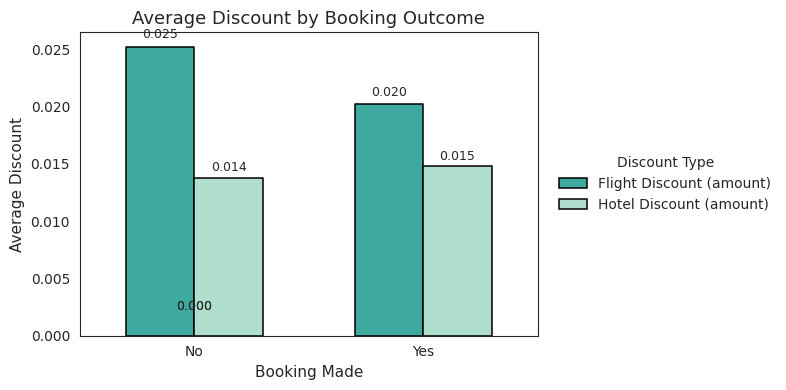

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

plt.figure(figsize=(8, 4))

ax = sns.barplot(
    data=discount_long,
    x="booking_made",
    y="avg_discount",
    hue="discount_type",
    palette=["#2BBBAD", "#A8E6CF"],   # teal & light green
    edgecolor="black",
    width=0.6
)

# Rounded bar edges + value labels
for bar in ax.patches:
    bar.set_linewidth(1.1)
    bar.set_joinstyle("round")
    value = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        value + (value * 0.02 if value > 0 else 0.002),
        f"{value:.3f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

ax.set_title("Average Discount by Booking Outcome", fontsize=13)
ax.set_xlabel("Booking Made", fontsize=11)
ax.set_ylabel("Average Discount", fontsize=11)

# Legend outside (fix overlap)
ax.legend(
    title="Discount Type",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)

plt.tight_layout()
plt.show()


Insight:

Sessions that end in a booking tend to be associated with higher average discounts.
This supports the idea that price incentives are an effective lever for conversion.

6.9 Cancellation Rate and Patterns

In [ ]:
cancel_rate = sessions_clean["cancellation"].mean() * 100
print(f"Overall session-level cancellation rate: {cancel_rate:.2f}%")


Overall session-level cancellation rate: 1.24%


6.9.1 cancellation vs booking:

In [ ]:
cancel_by_flight_booking = (
    sessions_clean
    .groupby("flight_booked")["cancellation"]
    .mean() * 100
)

cancel_by_flight_booking


,cancellation
flight_booked,
False,0.000000
True,4.259777


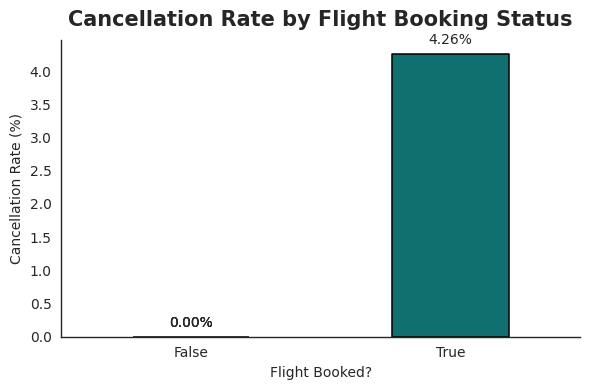

In [ ]:
# ULTRA-PREMIUM CANCELLATION RATE BARPLOT (Fixed Size)

sns.set_style("white")

# Elegant figure size
plt.figure(figsize=(6,4))

# Colors
teal = "#008080"

ax = sns.barplot(
    data=cancel_by_flight_booking.reset_index(),
    x="flight_booked",
    y="cancellation",
    hue="flight_booked",
    palette=[teal, teal],   # same color for both categories
    dodge=False,
    edgecolor="black",
    width=0.45              # <-- FIXED BAR WIDTH
)

# Remove legend (not needed)
ax.get_legend().remove()

# Rounded bars + value labels
for bar in ax.patches:
    bar.set_linewidth(1.1)
    bar.set_joinstyle("round")
    value = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        value + 0.1,
        f"{value:.2f}%",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="medium"
    )

# Title & labels
plt.title("Cancellation Rate by Flight Booking Status",
          fontsize=15, fontweight="bold", pad=10)
plt.xlabel("Flight Booked?")
plt.ylabel("Cancellation Rate (%)")

# Remove gridlines
ax.grid(False)

# Minimalist spine styling
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
ax.spines["left"].set_linewidth(1)
ax.spines["bottom"].set_linewidth(1)

plt.tight_layout()
plt.show()


Insight:

Cancellations are concentrated among sessions that actually result in bookings (which is expected),
but the cancellation percentage helps TravelTide evaluate the stability of its bookings.

### 6.10 Heat Map (Correlation Analysis)

#### Why the Heat Map?
A correlation heat map helps us quickly understand how key session-level behaviors move together.  
This is useful for marketing because it highlights signals that may be associated with conversion (booking) or risk (cancellation).

#### What we measure here
We focus on the most important session behaviors:
- **Engagement**: `session_duration_min`, `page_clicks`
- **Booking intent / conversion**: `flight_booked`, `hotel_booked` (and a combined `is_booking_session`)
- **Price sensitivity**: `flight_discount`, `hotel_discount` (and a combined `has_discount`)
- **Risk behavior**: `cancellation`

#### How to interpret correlation values
- **+1.00** → strong positive relationship (both increase together)
- **0.00** → no clear relationship
- **−1.00** → strong negative relationship (one increases as the other decreases)

#### What insights we look for
- Do **longer sessions** or **more clicks** relate to **more bookings**?
- Are **discount users** more likely to **cancel**?
- Do engagement indicators correlate more with booking than discounts do?

This analysis supports later segmentation by identifying which session behaviors are most connected to conversion and cancellation patterns.



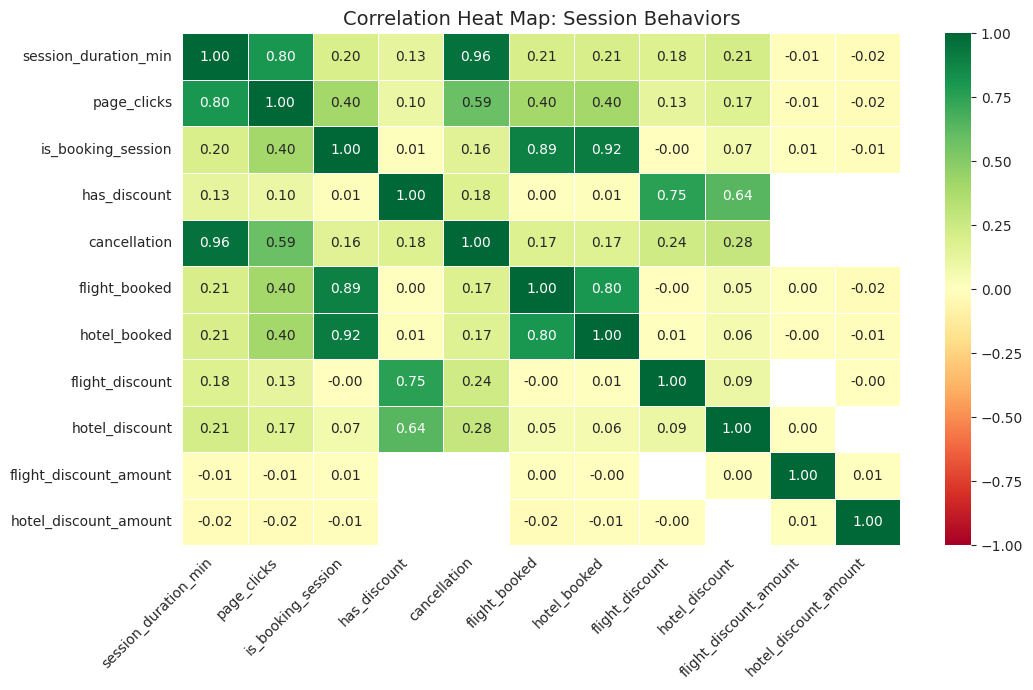

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1) Create robust binary flags (works even if some columns are missing)
# -----------------------------
df_hm = sessions_clean.copy()

# Booking session flag (flight OR hotel booked)
if "flight_booked" in df_hm.columns and "hotel_booked" in df_hm.columns:
    df_hm["is_booking_session"] = (df_hm["flight_booked"].astype(int) | df_hm["hotel_booked"].astype(int))
elif "flight_booked" in df_hm.columns:
    df_hm["is_booking_session"] = df_hm["flight_booked"].astype(int)
elif "hotel_booked" in df_hm.columns:
    df_hm["is_booking_session"] = df_hm["hotel_booked"].astype(int)

# Discount flag (flight OR hotel discount)
if "flight_discount" in df_hm.columns and "hotel_discount" in df_hm.columns:
    df_hm["has_discount"] = (df_hm["flight_discount"].astype(int) | df_hm["hotel_discount"].astype(int))
elif "flight_discount" in df_hm.columns:
    df_hm["has_discount"] = df_hm["flight_discount"].astype(int)
elif "hotel_discount" in df_hm.columns:
    df_hm["has_discount"] = df_hm["hotel_discount"].astype(int)

# -----------------------------
# 2) Select columns for correlation heatmap (only those that exist)
# -----------------------------
candidate_cols = [
    "session_duration_min",
    "page_clicks",
    "is_booking_session",
    "has_discount",
    "cancellation",
    "flight_booked",
    "hotel_booked",
    "flight_discount",
    "hotel_discount",
    "flight_discount_amount",
    "hotel_discount_amount"
]

heat_cols = [c for c in candidate_cols if c in df_hm.columns]

# Ensure numeric
heatmap_df = df_hm[heat_cols].copy()
for c in heatmap_df.columns:
    if heatmap_df[c].dtype == "bool":
        heatmap_df[c] = heatmap_df[c].astype(int)

# Drop rows with all NaNs in selected columns (safe)
heatmap_df = heatmap_df.dropna(how="all", subset=heat_cols)

# -----------------------------
# 3) Correlation matrix
# -----------------------------
corr_matrix = heatmap_df.corr(numeric_only=True)

# -----------------------------
# 4) Plot heatmap
# -----------------------------
plt.figure(figsize=(11, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    vmin=-1, vmax=1, center=0,
    cmap="RdYlGn"
)

plt.title("Correlation Heat Map: Session Behaviors", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


7. Export Cleaned Session Dataset for Later Parts

In [ ]:
output_path = "/content/drive/MyDrive/traveltide_sessions_clean.csv"
sessions_clean.to_csv(output_path, index=False)
print("Cleaned sessions file saved to:", output_path)


Cleaned sessions file saved to: /content/drive/MyDrive/traveltide_sessions_clean.csv


7. Short Summary

Session-Level Summary

* The majority of sessions are short and low-click, indicating quick browsing
behavior with a smaller group of highly engaged users.

* Conversion from session to booking is relatively low, especially for hotel bookings, confirming that many users are in exploration mode.

* Discounts are more prominent in sessions that result in bookings, suggesting that price incentives play an important role in driving conversions.

* The cleaned, enriched session dataset (with session duration and fixed types) is now ready for user-level aggregation and customer segmentation in the next parts of the project.



## PART 2. User-Level Aggregation   
#### 1. Objective
##### This part focuses on creating a complete profile for each user by combining demographic data and aggregated session behavior. The goal is to understand overall engagement patterns at the individual level. These enriched user profiles form the foundation for deeper behavioral analysis and segmentation.


1. Create User-Level Features (Core Aggregation)

In [ ]:
import numpy as np
import pandas as pd

df = sessions_clean.copy()

# -----------------------------
# 1) Ensure key binary flags exist (robust)
# -----------------------------
# Booking flag
if "is_booking_session" not in df.columns:
    df["is_booking_session"] = (
        df.get("flight_booked", 0).fillna(0).astype(int) |
        df.get("hotel_booked", 0).fillna(0).astype(int)
    ).astype(int)

# Discount flag
if "has_discount" not in df.columns:
    # If discount flags exist, use them; otherwise infer from amount columns
    if "flight_discount" in df.columns or "hotel_discount" in df.columns:
        df["has_discount"] = (
            df.get("flight_discount", 0).fillna(0).astype(int) |
            df.get("hotel_discount", 0).fillna(0).astype(int)
        ).astype(int)
    else:
        df["has_discount"] = (
            (df.get("flight_discount_amount", 0).fillna(0) > 0).astype(int) |
            (df.get("hotel_discount_amount", 0).fillna(0) > 0).astype(int)
        ).astype(int)

# Cancellation flag (keep as 0/1)
if "cancellation" in df.columns and "is_cancelled" not in df.columns:
    df["is_cancelled"] = df["cancellation"].fillna(0).astype(int)
elif "is_cancelled" not in df.columns:
    df["is_cancelled"] = 0

# Session duration column naming safety
duration_col = "session_duration_min" if "session_duration_min" in df.columns else "session_duration_minutes"
clicks_col   = "page_clicks" if "page_clicks" in df.columns else "total_clicks"

for col in [duration_col, clicks_col]:
    if col not in df.columns:
        df[col] = np.nan

# -----------------------------
# 2) Build user-level aggregation
# -----------------------------
user_agg = (
    df.groupby("user_id")
      .agg(
          total_sessions=("user_id", "size"),
          avg_session_duration=(duration_col, "mean"),
          median_session_duration=(duration_col, "median"),
          total_clicks=(clicks_col, "sum"),
          avg_clicks_per_session=(clicks_col, "mean"),

          booking_sessions=("is_booking_session", "sum"),
          booking_rate=("is_booking_session", "mean"),

          discount_sessions=("has_discount", "sum"),
          discount_rate=("has_discount", "mean"),

          cancelled_sessions=("is_cancelled", "sum")
      )
      .reset_index()
)

# Cancellation rate should only be calculated among booking sessions
user_agg["cancellation_rate"] = np.where(
    user_agg["booking_sessions"] > 0,
    user_agg["cancelled_sessions"] / user_agg["booking_sessions"],
    0
)

user_agg.head()


,user_id,total_sessions,avg_session_duration,median_session_duration,total_clicks,avg_clicks_per_session,booking_sessions,booking_rate,discount_sessions,discount_rate,cancelled_sessions,cancellation_rate
0,23557,8,1.277083,1.158333,82,10.250,2,0.250,2,0.250,0,0.0
1,94883,8,1.129167,0.625000,73,9.125,2,0.250,1,0.125,0,0.0
2,101486,8,2.037500,2.433333,131,16.375,2,0.250,2,0.250,0,0.0
3,101961,8,1.962500,2.216667,126,15.750,5,0.625,3,0.375,0,0.0
4,106907,8,2.821429,2.316667,240,30.000,2,0.250,1,0.125,1,0.5


2. Add Spend Features (Flights + Hotels)    
This creates realistic value-based features for marketing.

In [ ]:
# -----------------------------
# Spend columns safety
# -----------------------------
fare_col  = "base_fare_usd" if "base_fare_usd" in df.columns else None
hotel_col = "hotel_per_room_usd" if "hotel_per_room_usd" in df.columns else None

# Nights / rooms safety (if exists)
nights_col = "nights" if "nights" in df.columns else None
rooms_col  = "rooms"  if "rooms"  in df.columns else None

# Compute flight spend per session
if fare_col:
    df["flight_spend"] = pd.to_numeric(df[fare_col], errors="coerce").fillna(0)
else:
    df["flight_spend"] = 0

# Compute hotel spend per session = price_per_room * rooms * nights (if available)
if hotel_col:
    hotel_rate = pd.to_numeric(df[hotel_col], errors="coerce").fillna(0)
    rooms = pd.to_numeric(df[rooms_col], errors="coerce").fillna(1) if rooms_col else 1
    nights = pd.to_numeric(df[nights_col], errors="coerce").fillna(1) if nights_col else 1
    df["hotel_spend"] = hotel_rate * rooms * nights
else:
    df["hotel_spend"] = 0

df["total_spend"] = df["flight_spend"] + df["hotel_spend"]

# Aggregate spend to user level
spend_user = (
    df.groupby("user_id")
      .agg(
          total_flight_spend=("flight_spend", "sum"),
          total_hotel_spend=("hotel_spend", "sum"),
          total_spend=("total_spend", "sum"),
          avg_spend_per_session=("total_spend", "mean")
      )
      .reset_index()
)

# Merge into user_agg
user_agg = user_agg.merge(spend_user, on="user_id", how="left").fillna(0)

user_agg.head()


,user_id,total_sessions,avg_session_duration,median_session_duration,total_clicks,avg_clicks_per_session,booking_sessions,booking_rate,discount_sessions,discount_rate,cancelled_sessions,cancellation_rate,total_flight_spend,total_hotel_spend,total_spend,avg_spend_per_session
0,23557,8,1.277083,1.158333,82,10.250,2,0.250,2,0.250,0,0.0,0,0,0,0.0
1,94883,8,1.129167,0.625000,73,9.125,2,0.250,1,0.125,0,0.0,0,0,0,0.0
2,101486,8,2.037500,2.433333,131,16.375,2,0.250,2,0.250,0,0.0,0,0,0,0.0
3,101961,8,1.962500,2.216667,126,15.750,5,0.625,3,0.375,0,0.0,0,0,0,0.0
4,106907,8,2.821429,2.316667,240,30.000,2,0.250,1,0.125,1,0.5,0,0,0,0.0


### Output: User-Level Customer Profile Table
Each row represents one user, with aggregated behavioral features including:

- **Engagement**: average/median session duration, total clicks, clicks per session
- **Conversion**: booking sessions and booking rate
- **Discount sensitivity**: discount sessions and discount rate
- **Risk behavior**: cancellation rate among booking sessions
- **Customer value**: total flight spend, total hotel spend, total spend, average spend per session

This dataset will be used in Part 3 to form actionable customer segments for personalized marketing rewards.


### 3. User-Level Exploratory Data Analysis (EDA)

In this section, we explore user-level behavioral patterns derived from aggregated session data.
The goal is to understand how users differ in terms of engagement, booking behavior, spending,
discount usage, and cancellation risk before moving to customer segmentation.

All visualizations use standard, simple plots to clearly communicate patterns and distributions.



#### 3.1 Distribution of Total Sessions per User
This histogram shows how frequently users visit the platform.    
It helps identify casual users versus highly engaged repeat visitors.


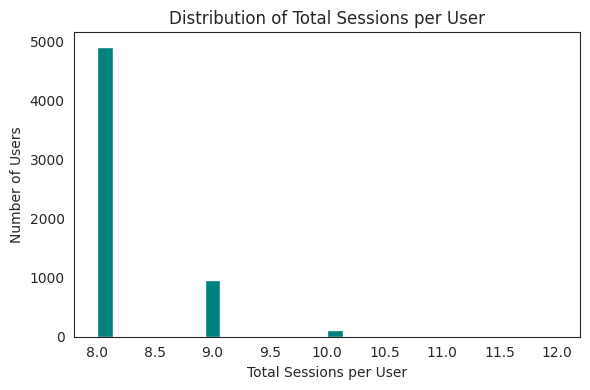

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(user_agg["total_sessions"], bins=30)
plt.xlabel("Total Sessions per User")
plt.ylabel("Number of Users")
plt.title("Distribution of Total Sessions per User")
plt.tight_layout()
plt.show()


#### 3.2 Distribution of Total Spend per User
This plot highlights differences in customer value.   
Most users spend relatively little, while a small number of users account for high total spending.


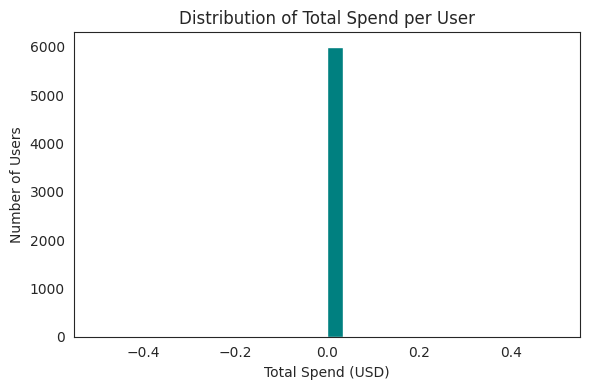

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(user_agg["total_spend"], bins=30)
plt.xlabel("Total Spend (USD)")
plt.ylabel("Number of Users")
plt.title("Distribution of Total Spend per User")
plt.tight_layout()
plt.show()


#### 3.3 Booking Rate vs Total Spend
This scatter plot examines whether users who book more frequently
also tend to generate higher revenue.


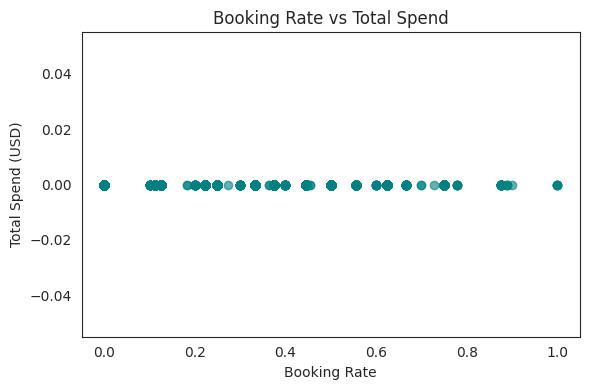

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(
    user_agg["booking_rate"],
    user_agg["total_spend"],
    alpha=0.6
)
plt.xlabel("Booking Rate")
plt.ylabel("Total Spend (USD)")
plt.title("Booking Rate vs Total Spend")
plt.tight_layout()
plt.show()


#### 3.4 Discount Rate vs Cancellation Rate
This visualization explores whether users who rely more on discounts
are also more likely to cancel bookings.


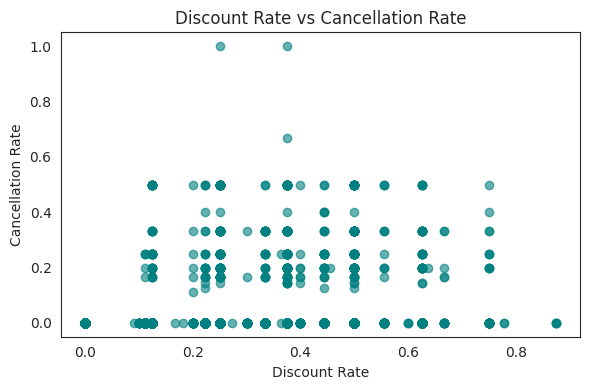

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(
    user_agg["discount_rate"],
    user_agg["cancellation_rate"],
    alpha=0.6
)
plt.xlabel("Discount Rate")
plt.ylabel("Cancellation Rate")
plt.title("Discount Rate vs Cancellation Rate")
plt.tight_layout()
plt.show()


#### 3.5 Top 10 Highest-Spending Users
This bar chart highlights the most valuable users based on their total spend
(or booking volume when spend data is unavailable).
These users represent strong candidates for loyalty rewards and retention-focused offers.




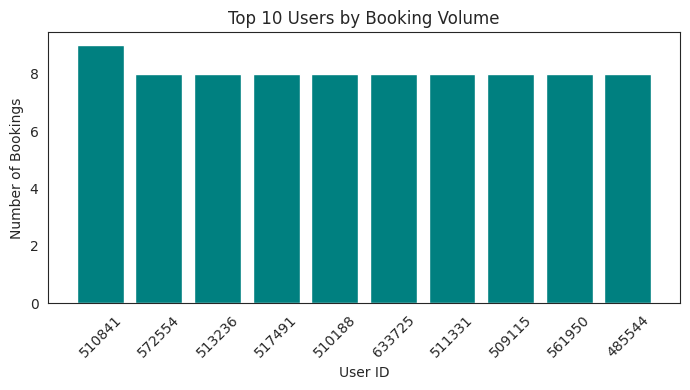

In [51]:
top_users = user_agg.sort_values("booking_sessions", ascending=False).head(10)

plt.figure(figsize=(7, 4))
plt.bar(
    top_users["user_id"].astype(str),
    top_users["booking_sessions"]
)
plt.xlabel("User ID")
plt.ylabel("Number of Bookings")
plt.title("Top 10 Users by Booking Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Key Observations from User-Level EDA

- Most users have a small number of sessions, while a minority are highly active.
- Total spend is right-skewed, indicating that a small group of users contributes disproportionately to revenue.
- Higher booking rates are generally associated with higher total spend.
- Users with higher discount rates tend to show higher cancellation rates, suggesting increased price sensitivity.
- High-spending users represent strong candidates for targeted retention and loyalty programs.


# TravelTide Customer Behavior Analysis & Segmentation

This project analyzes customer behavior on the TravelTide digital travel booking platform to support the development of a data-driven, personalized rewards and retention strategy. Using session, booking, trip, and cost data, the analysis tracks the full customer journey from search activity to completed bookings.

The workflow begins with session-level data cleaning and feature engineering, where engagement metrics, booking indicators, discount usage, trip characteristics, and cost features are derived. The enriched dataset is then aggregated at the user level to construct comprehensive customer profiles capturing engagement intensity, booking frequency, discount sensitivity, cancellation behavior, and customer value.

Exploratory data analysis highlights strong relationships between engagement and booking behavior, while discount usage is associated with more price-sensitive and variable booking patterns. Trip distance, duration, and spend further differentiate customer segments, revealing opportunities for targeted incentives rather than uniform discounting.

The final output provides a robust analytical foundation for customer segmentation and personalized marketing strategies, demonstrating how raw behavioral data can be transformed into actionable insights for growth, loyalty, and retention.